# Drug Consumption - Individual Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
sns.set_palette("Set1")

In [2]:
data = pd.read_csv("drug_consumption.csv")


In [3]:
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


### Exploratory Data Analysis

##### <div align="center">  Data Description </div>        

| **Column Name** |     **Description**                            |  
|----------       |:-------------:                                 |
| ID              |  ID                                            |
| Age             |  Age                                           |
| Gender          |  Gender                                        |
| Education       |  Level of education                            |
| Country         |  Country of current residence of participant   |
| Ethnicity       |  Ethnicity                                     |
| Nscore          |  NEO-FFI-R Neuroticism score                   |
| Escore          |  NEO-FFI-R Extraversion score                  |
| Oscore          |  NEO-FFI-R Openness to experience score        |
| Ascore          |  NEO-FFI-R Agreeableness score                 |
| Cscore          |  NEO-FFI-R Conscientiousness score             |
| Impulsive       |  Impulsiveness measured by BIS-11              |
| SS              |  Sensation seeing measured by ImpSS            |
| Alcohol         |  Class of alcohol consumption                  |
| Amphet          |  Class of amphetamines consumption             |  
| Amyl            |  Class of amyl nitrite consumption             |
| Benzos          |  Class of benzodiazepine consumption           |
| Caff            |  Class of caffeine consumption                 |
| Cannabis        |  Class of cannabis consumption                 |
| Choc            |  Class of chocolate consumption                | 
| Coke            |  Class of cocaine consumption                  |
| Crack           |  Class of crack consumption                    |
| Ecstasy         |  Class of ecstasy consumption                  |
| Heroin          |  Class of heroin consumption                   |
| Ketamine        |  Class of ketamine consumption                 |
| Legalh          |  Class of legal highs consumption              |
| LSD             |  Class of alcohol consumption                  |
| Meth            |  Class of methadone consumption                |
| Mushrooms       |  Class of magic mushrooms consumption          |
| Nicotine        |  Class of nicotine consumption                 |
| Semer           |  Class of fictitious drug Semeron consumption  |
| VSA             |  Class of volatile substance abuse consumption |

In [4]:
# General information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1885 entries, 0 to 1884
Data columns (total 32 columns):
ID           1885 non-null int64
Age          1885 non-null float64
Gender       1885 non-null float64
Education    1885 non-null float64
Country      1885 non-null float64
Ethnicity    1885 non-null float64
Nscore       1885 non-null float64
Escore       1885 non-null float64
Oscore       1885 non-null float64
Ascore       1885 non-null float64
Cscore       1885 non-null float64
Impulsive    1885 non-null float64
SS           1885 non-null float64
Alcohol      1885 non-null object
Amphet       1885 non-null object
Amyl         1885 non-null object
Benzos       1885 non-null object
Caff         1885 non-null object
Cannabis     1885 non-null object
Choc         1885 non-null object
Coke         1885 non-null object
Crack        1885 non-null object
Ecstasy      1885 non-null object
Heroin       1885 non-null object
Ketamine     1885 non-null object
Legalh       1885 non-null objec

In [5]:
# Change data types 

data["Age"] = np.round(data["Age"], decimals=5)
data["Gender"] = np.round(data["Gender"], decimals=5)
data["Education"] = np.round(data["Education"], decimals=5)
data["Country"] = np.round(data["Country"], decimals=5)
data["Ethnicity"] = np.round(data["Ethnicity"], decimals=5)

In [6]:
data['Age'] = data['Age'].replace([-0.95197,-0.07854, 0.49788,1.09449,1.82213,2.59171],
                                  ['18-24','25-34','35-44','45-54','55-64','65+'])
data['Gender'] = data['Gender'].replace([0.48246,-0.48246],
                                        ["Female","Male"])
data["Education"] = data["Education"].replace([-2.43591,-1.73790,-1.43719,-1.22751,-0.61113,-0.05921,0.45468,1.16365,1.98437],
                                              ["Left school before 16","Left school at 16","Left school at 17","Left school at 18","Some college","Professional certificate","University degree","Masters degree","Doctorate degree"])
data["Country"] = data["Country"].replace([-0.09765,0.24923,-0.46841,-0.28519,0.21128,0.96082,-0.57009],
                                          ["Australia","Canada","New Zealand","Other","Republic of Ireland","UK","US"])
data["Ethnicity"] = data["Ethnicity"].replace([-0.50212,-1.10702,1.90725,0.12600,-0.22166,0.11440,-0.31685],
                                              ["Asian","Black","Mixed-Black/Asian","Mixed-White/Asian","Mixed-White/Black","Other","White"])
data.head()

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,...,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,...,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,35-44,Male,Professional certificate,UK,White,-0.46725,0.80523,-0.84732,-1.62090,...,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,...,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,...,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0


In [7]:
data.drop('ID',
  axis='columns', inplace=True)

### Showing histograms for numeric variables, to better understand data

Text(0.5, 0, 'Neuroticism score')

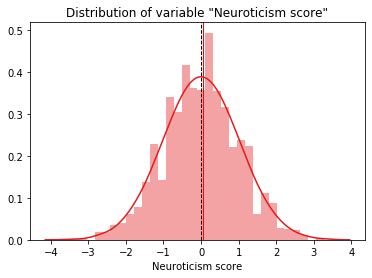

In [8]:
sns.distplot(data.Nscore)
plt.axvline(data.Nscore.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.Nscore.median(), color='r', linewidth=1)
plt.title('Distribution of variable "Neuroticism score"')
plt.xlabel("Neuroticism score")

Text(0.5, 0, 'Extraverion  score')

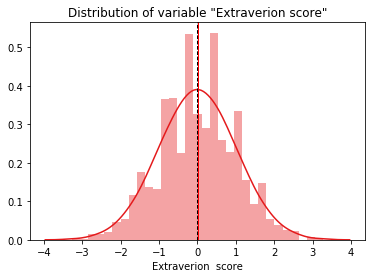

In [9]:
sns.distplot(data.Escore)
plt.axvline(data.Escore.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.Escore.median(), color='r', linewidth=1)
plt.title('Distribution of variable "Extraverion score"')
plt.xlabel("Extraverion  score")

Text(0.5, 0, 'Openness to experience  score')

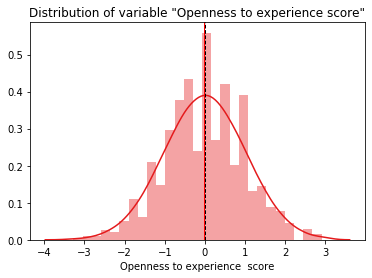

In [10]:
sns.distplot(data.Oscore)
plt.axvline(data.Oscore.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.Oscore.median(), color='r', linewidth=1)
plt.title('Distribution of variable "Openness to experience score"')
plt.xlabel("Openness to experience  score")

Text(0.5, 0, 'Agreeableness  score')

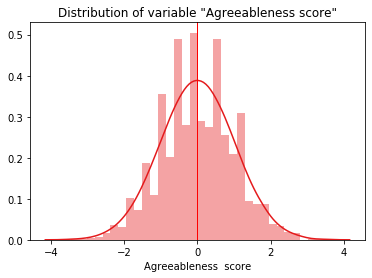

In [11]:
sns.distplot(data.Ascore)
plt.axvline(data.Ascore.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.Ascore.median(), color='r', linewidth=1)
plt.title('Distribution of variable "Agreeableness score"')
plt.xlabel("Agreeableness  score")

Text(0.5, 0, 'Conscientiousness  score')

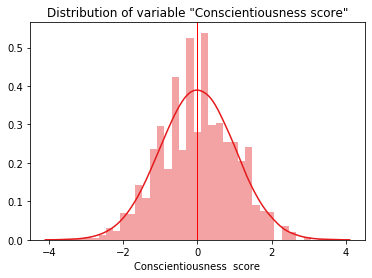

In [12]:
sns.distplot(data.Cscore)
plt.axvline(data.Cscore.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(data.Cscore.median(), color='r', linewidth=1)
plt.title('Distribution of variable "Conscientiousness score"')
plt.xlabel("Conscientiousness  score")

#### We can say that in general our numeric variables are normal distributed, and whose mean and median are almost the same

### For categorical variables will plot barplot and piechart, to represent the distribution of discrete values.

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

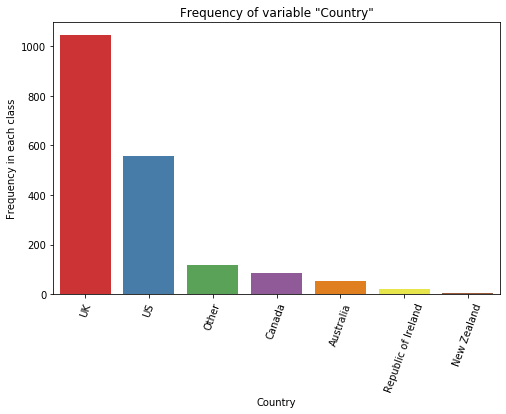

In [13]:
plt.figure(figsize=(8,5))
sns.countplot(data['Country'],order = data['Country'].value_counts().index)
plt.title('Frequency of variable "Country"')
plt.xlabel("Country")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

#### From this plot we can say that the most of our observations (people) are from UK

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

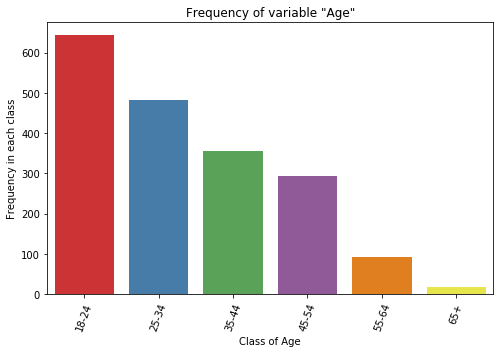

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data['Age'],order = data['Age'].value_counts().index)
plt.title('Frequency of variable "Age"')
plt.xlabel("Class of Age")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

#### From this plot we can say that the most of our observations (people) are at the age of 18-24, and we have less older people in our data

(array([0, 1]), <a list of 2 Text xticklabel objects>)

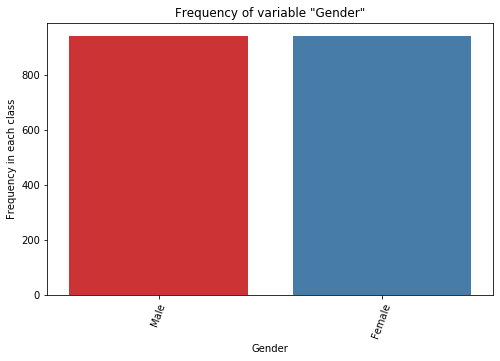

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(data['Gender'],order = data['Gender'].value_counts().index)
plt.title('Frequency of variable "Gender"')
plt.xlabel("Gender")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

#### From this plot we see that we have almost equal observations for female and male

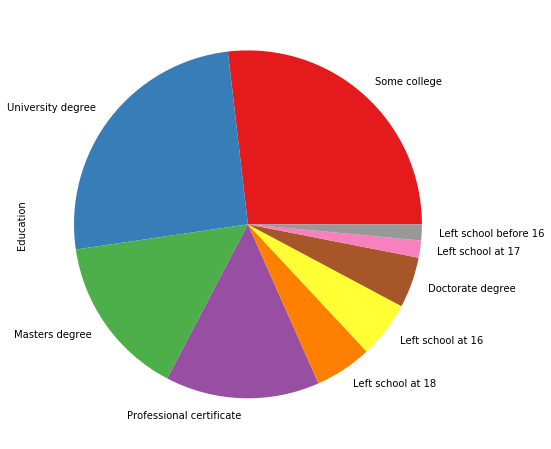

In [16]:
edu = data['Education'].value_counts().plot(kind='pie', figsize=(8, 8))

#### Here is shown the distribution of values of Education

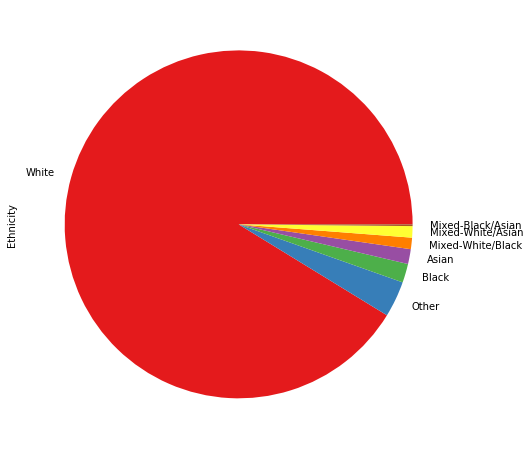

In [17]:
edu = data['Ethnicity'].value_counts().plot(kind='pie', figsize=(8, 8))

#### This is the same as above plot but for column Ethnicity

#### for drug's columns we have these categories, which represents
#### CL0 - Never Used 
#### CL1 - Used over a Decade Ago
#### CL2 - Used in Last Decade
#### CL3 - Used in Last Year
#### CL4 - Used in Last Month
#### CL5 - Used in Last Week
#### CL6 - Used in Last Day

In [18]:
class_order = ['CL0','CL1','CL2','CL3','CL4','CL5','CL6']

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

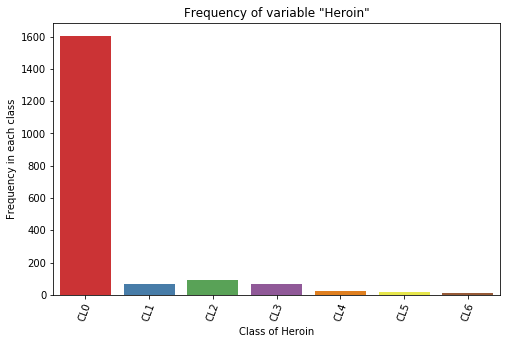

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data['Heroin'],order = class_order)
plt.title('Frequency of variable "Heroin"')
plt.xlabel("Class of Heroin")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

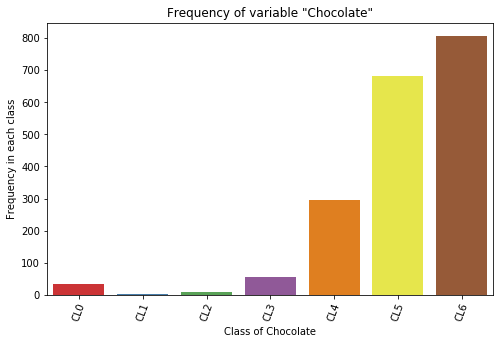

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(data['Choc'], order = class_order)
plt.title('Frequency of variable "Chocolate"')
plt.xlabel("Class of Chocolate")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

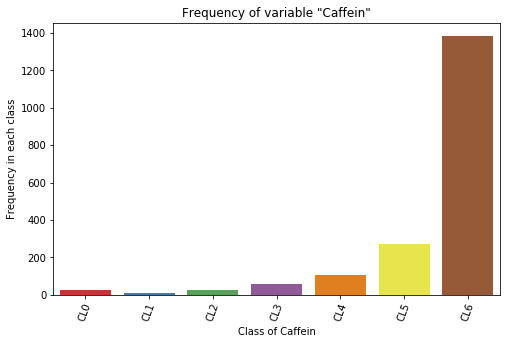

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(data['Caff'], order = class_order)
plt.title('Frequency of variable "Caffein"')
plt.xlabel("Class of Caffein")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

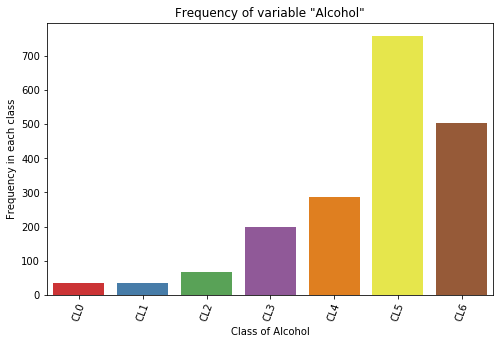

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data['Alcohol'], order = class_order)
plt.title('Frequency of variable "Alcohol"')
plt.xlabel("Class of Alcohol")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

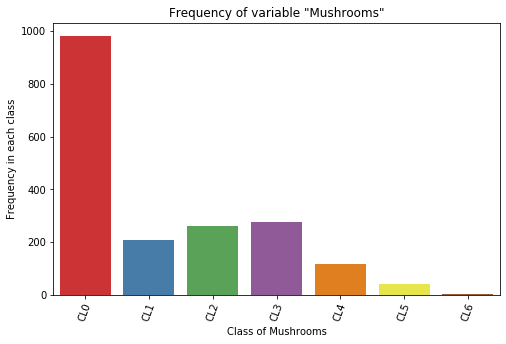

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data['Mushrooms'], order = class_order)
plt.title('Frequency of variable "Mushrooms"')
plt.xlabel("Class of Mushrooms")
plt.ylabel("Frequency in each class")
plt.xticks(rotation = 70)

#### From these visualizations we can conclude that for drugs we have lots of people that didn't try even the drug, but for example for Caffein, Chocolate or for alcohol it's opposite, The most peolpe used it the day before the survey or during last week. Now we have  general idea of our data 

### Scatterplots for 2 columns of Scores.

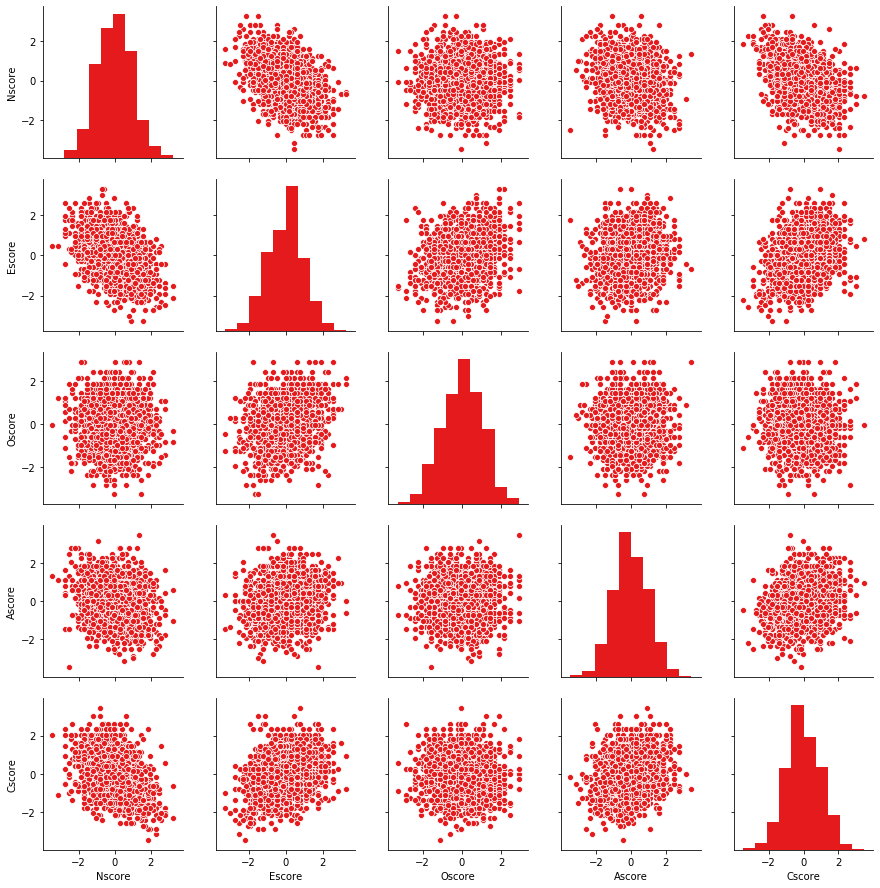

In [24]:
num_cols = ['Nscore', "Escore", 'Oscore', 'Ascore', 'Cscore']
sns.pairplot(data, vars = num_cols)

#### We can see that there is no visible connections between these variables

Text(0.5, 1, 'Correlation Matrix of Scores')

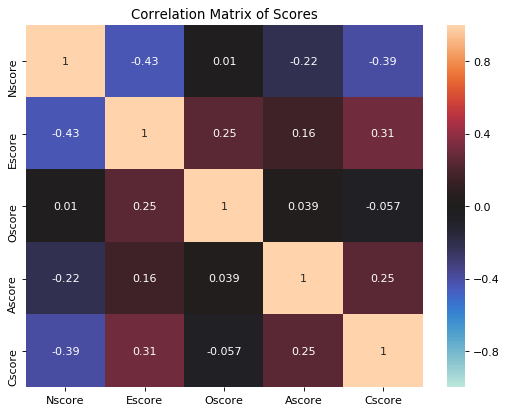

In [25]:
corr = data[num_cols].corr()

plt.figure(num=None, figsize=(8, 6), dpi=80)
ax = sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=corr)
plt.title('Correlation Matrix of Scores')

#### From here we also can see that we don't have high correlation between these variables.

#### In original data we had 7 class for each drug, I will combine them to 2 classes, "Used" - 1. "Not used" - 0

In [26]:
data_1 = data.replace({
    'CL0' : 0, # Never Used cannabis
    'CL1' : 1, # Used cannabis over a decade ago
    'CL2' : 1, # Used in last decade
    'CL3' : 1, # Used in last year
    'CL4' : 1, # Used in last month
    'CL5' : 1, # Used in last week
    'CL6' : 1  # Used in last day
})
data_1.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,35-44,Female,Professional certificate,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
1,25-34,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
2,35-44,Male,Professional certificate,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,18-24,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
4,35-44,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,1,1,0,0


Text(0.5, 1.0, 'Barplot of Caffein users and not users grouped by gender')

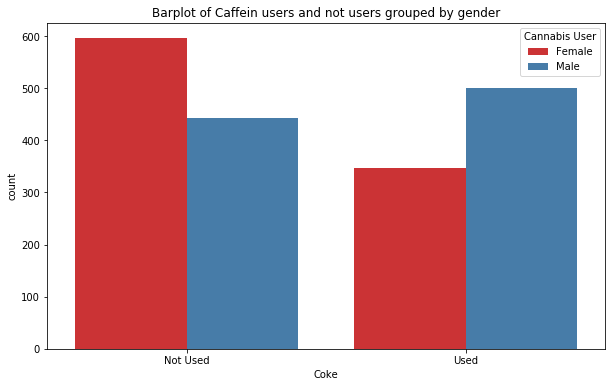

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Coke',hue='Gender',data=data_1).set_xticklabels(['Not Used', 'Used'])
plt.legend(title='Cannabis User', labels=['Female', 'Male'])
plt.title('Barplot of Caffein users and not users grouped by gender')

#### With this plot I wanted to show the balance of male and female among  Cocaine users and not user. So we can see that among not users we have more females than males, and the opposite is for Cocaine users(more males than females)

Text(0.5, 1.0, 'Barplot of Caffein users and not users grouped by Education')

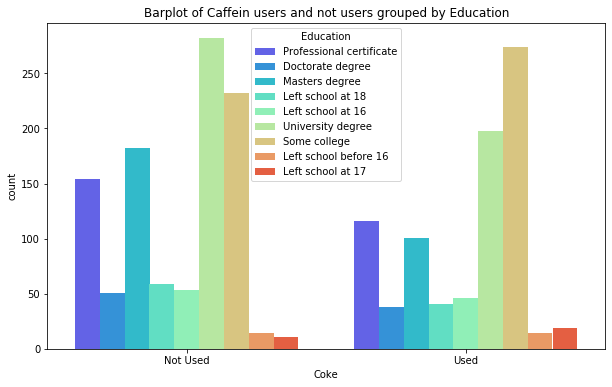

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Coke',hue='Education',data=data_1,palette='rainbow').set_xticklabels(['Not Used', 'Used'])
plt.title('Barplot of Caffein users and not users grouped by Education')

#### As we have almost same distribution of Education for Cocaine users and not users, we can say that education doesn't affect to Cocaine using. 

In [29]:
data_main = data_1.copy()
data_1['Age'].replace({
    '18-24' :1,
    '25-34':2,
    '35-44':3,
    '45-54':4,
    '55-64':5,
    '65+':6}, 
    inplace=True
)

C:\Users\User\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1, 'Violinplot of Caffeine')

<Figure size 720x432 with 0 Axes>

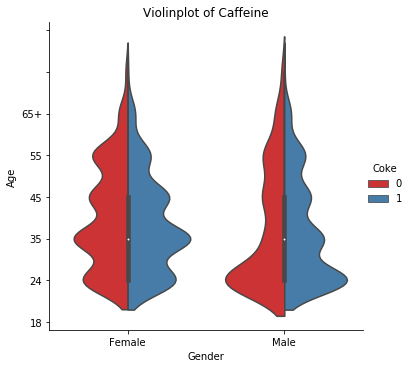

In [30]:
plt.figure(figsize=(10,6))
sns.factorplot(x='Gender' , y='Age' , data=data_1 , hue='Coke' , kind='violin', split=True).set_yticklabels(['0','18','24','35','45','55','65+'])
plt.title('Violinplot of Caffeine')

#### Here is shown distribution of sales separatly for Cocaine users and not users, and for male and female. And we can't see much difference between Cocaine users and not users

Text(0.5, 1.0, 'Boxplot of Age')

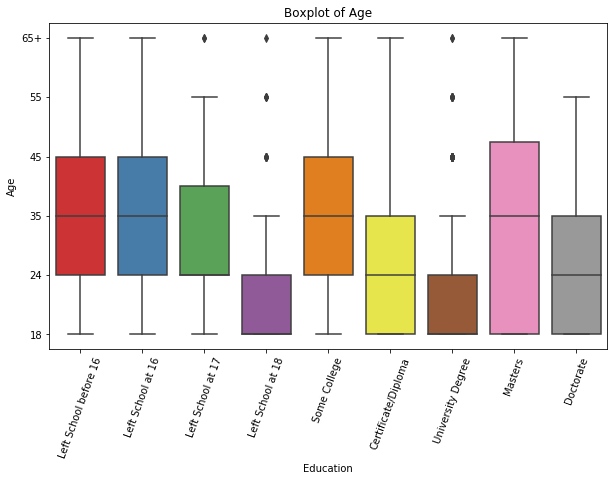

In [31]:
data_2 = data_1[data_1["Coke"]==1]
plt.figure(figsize=(10,6))
pl1 = sns.boxplot(x='Education',y='Age',data=data_1)
pl1.set_xticklabels(['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate'],rotation=70)
pl1.set_yticklabels(['0','18','24','35','45','55','65+'])
plt.title('Boxplot of Age')

#### When I have done our barplot related to the education and found out that the destribution among the people who have used the drug and not used it, is the same. We can assume that education doesn't effect the consumption of drugs. To check this assumtion more throughly , I have ploted the box plot to find out the age when, person had used the drug. It is interesting that here we have seen that with higher degree person's age for using the drug the first time get lower and close to the 18. So for people with higher degree and people who are left the school we see strong difference in their age ranges when they were starting to use the durg. So, we can conclude that education maybe doesn't effect on using the drug, and doesn't push the person with no any predisposition. But when we look at boxplot we can conclude that some specific circumstances related to education can affect people with predisposition, one of them can be the stresses and the people characteristics like high responsibility, so maybe the drugs can be the source of energy to do all that work or the source of relax.

Text(0.5, 1.0, 'Mosaic plot of Gender and Education')

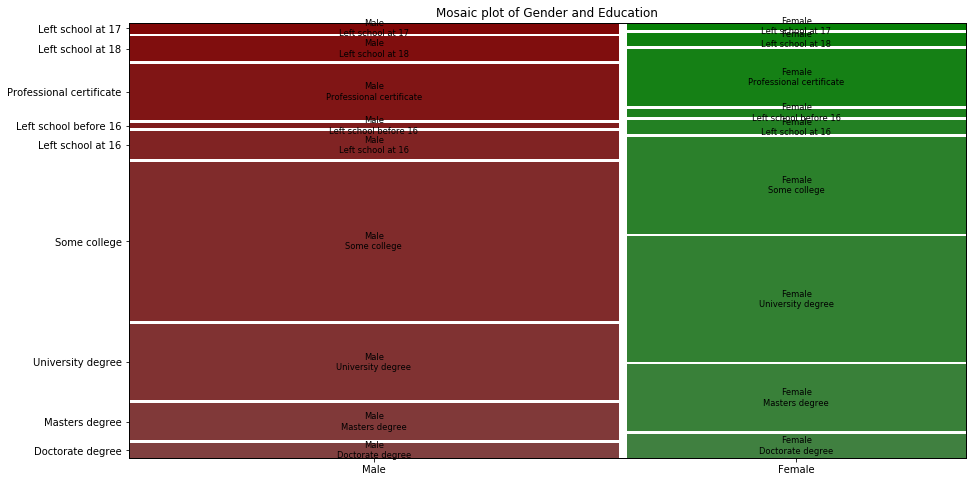

In [32]:
fig, ax = plt.subplots(figsize = (15,8))

mosaic(data_2, ['Gender','Education'], ax = ax, gap = 0.01);
plt.title('Mosaic plot of Gender and Education')

#### Here is shown mosaic plot for Cocaine users , and we can say that target group for Cocaine are "Male"s who graduated from "Some college", and "Female" with "University degree"

In [33]:
data_3 = data_1[data_1["Country"] == "UK"]
data_3.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,3,Female,Professional certificate,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,0,1,0,0
1,2,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,1,0,1,0,1,1,0,1,0,0
2,3,Male,Professional certificate,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,0,1,0,0,0
3,1,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,0,1,0,0,0,0,1,0,0
4,3,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,1,0,0,1,0,0,1,1,0,0


In [34]:
#data_3 = data_3[data_3["Coke"] == 1]
data_grouped = data_3.groupby(["Age","Coke"]).size().reset_index()

In [35]:
data_grouped

,Age,Coke,0
0,1,0,128
1,1,1,75
2,2,0,179
3,2,1,101
4,3,0,162
5,3,1,96
6,4,0,168
7,4,1,58
8,5,0,52
9,5,1,13


Text(0.5, 1.0, 'Barplot of Age for Caffeine users and not users')

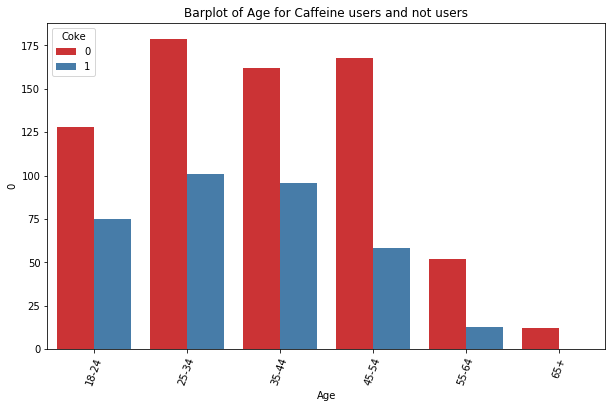

In [36]:
plt.figure(figsize=(10,6))
plt2 = sns.barplot(data = data_grouped, x = "Age", y = 0, hue = "Coke")
plt2.set_xticklabels(['18-24',
    '25-34',
    '35-44',
    '45-54',
    '55-64',
    '65+' ],rotation=70)
plt.title('Barplot of Age for Caffeine users and not users')

#### For UK we see that we have more not users of Cocaine than users. But we can look at which age the difference of users and not user is the bigest. So I think it's "18-24", and we can say that this is target group for Cocain in UK.

In [37]:
data_high_drugs = data_1[data_1.columns.difference(['Caff', 'Choc','Coke','Alcohol'])]

In [38]:
data_high_drugs.groupby("Education").sum()

,Age,Amphet,Amyl,Ascore,Benzos,Cannabis,Crack,Cscore,Ecstasy,Escore,...,LSD,Legalh,Meth,Mushrooms,Nicotine,Nscore,Oscore,SS,Semer,VSA
Education,,,,,,,,,,,,,,,,,,,,,
Doctorate degree,260,41,32,17.22102,45,64,12,43.38512,36,18.43331,...,30,22,21,35,62,-26.95169,22.18232,-28.17079,0,22
Left school at 16,304,48,39,-3.21061,44,65,15,-6.42701,36,-16.00056,...,35,25,20,32,77,2.85947,-62.42720,-19.88221,1,18
Left school at 17,68,20,7,-11.99263,16,25,9,-12.50508,18,-12.33847,...,16,14,8,20,25,16.90176,-8.23359,3.39720,1,11
Left school at 18,181,53,24,-15.93604,48,86,18,-30.35556,57,-13.42872,...,48,61,39,53,89,5.79051,-7.78527,14.63065,1,38
Left school before 16,86,18,10,3.95926,19,22,9,-1.64359,15,-4.76242,...,16,10,11,15,25,-2.00415,-9.74255,-7.18392,0,9
Masters degree,739,99,90,44.62284,105,202,15,104.43803,86,57.14514,...,80,77,28,98,193,-48.67457,0.32638,-58.94408,0,44
Professional certificate,780,116,87,9.71496,122,188,33,23.85708,100,-11.04408,...,105,82,53,110,200,-4.87378,-78.93148,-51.52663,0,46
Some college,829,295,132,-60.76098,286,473,95,-195.05118,321,-35.13151,...,298,339,191,326,443,61.02828,154.39985,186.05220,3,153
University degree,1175,219,159,15.92042,200,347,52,73.57445,195,16.82043,...,188,161,85,214,343,-3.98798,-10.79580,-44.57721,2,89


In [39]:
data_1.groupby("Education").sum()

,Age,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,...,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
Education,,,,,,,,,,,,,,,,,,,,,
Doctorate degree,260,-26.95169,18.43331,22.18232,17.22102,43.38512,-29.64236,-28.17079,86,41,...,36,11,15,22,30,21,35,62,0,22
Left school at 16,304,2.85947,-16.00056,-62.42720,-3.21061,-6.42701,-12.39267,-19.88221,98,48,...,36,16,18,25,35,20,32,77,1,18
Left school at 17,68,16.90176,-12.33847,-8.23359,-11.99263,-12.50508,4.64655,3.39720,30,20,...,18,9,3,14,16,8,20,25,1,11
Left school at 18,181,5.79051,-13.42872,-7.78527,-15.93604,-30.35556,12.29025,14.63065,97,53,...,57,21,34,61,48,39,53,89,1,38
Left school before 16,86,-2.00415,-4.76242,-9.74255,3.95926,-1.64359,-3.18949,-7.18392,28,18,...,15,8,4,10,16,11,15,25,0,9
Masters degree,739,-48.67457,57.14514,0.32638,44.62284,104.43803,-57.04687,-58.94408,278,99,...,86,17,42,77,80,28,98,193,0,44
Professional certificate,780,-4.87378,-11.04408,-78.93148,9.71496,23.85708,-5.29663,-51.52663,268,116,...,100,33,48,82,105,53,110,200,0,46
Some college,829,61.02828,-35.13151,154.39985,-60.76098,-195.05118,146.76753,186.05220,495,295,...,321,104,132,339,298,191,326,443,3,153
University degree,1175,-3.98798,16.82043,-10.79580,15.92042,73.57445,-42.53403,-44.57721,471,219,...,195,61,99,161,188,85,214,343,2,89


In [40]:
data_1.groupby("Education").size()

Education
Doctorate degree             89
Left school at 16            99
Left school at 17            30
Left school at 18           100
Left school before 16        28
Masters degree              283
Professional certificate    270
Some college                506
University degree           480
dtype: int64

In [41]:
hard_drugs = ["Amphet","Amyl","Benzos","Cannabis",
              "Coke","Crack","Ecstasy","Heroin","Ketamine","Legalh",
              "LSD","Meth","Mushrooms","Semer","VSA"]

In [42]:
by_all = data_1[hard_drugs].any(axis=1)

In [43]:
data_24 = data_1.assign(hard_drugs=by_all)

In [44]:
data_24.head()

,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,...,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA,hard_drugs
0,3,Female,Professional certificate,UK,Mixed-White/Asian,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,...,0,0,0,0,0,0,1,0,0,True
1,2,Male,Doctorate degree,UK,White,-0.67825,1.93886,1.43533,0.76096,-0.14277,...,0,1,0,1,1,0,1,0,0,True
2,3,Male,Professional certificate,UK,White,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,...,0,0,0,0,0,1,0,0,0,True
3,1,Female,Masters degree,UK,White,-0.14882,-0.80615,-0.01928,0.59042,0.58489,...,0,1,0,0,0,0,1,0,0,True
4,3,Female,Doctorate degree,UK,White,0.73545,-1.63340,-0.45174,-0.30172,1.30612,...,0,0,1,0,0,1,1,0,0,True


In [45]:
data_grouped = data_1.assign(hard_drugs=by_all).groupby(["Education", "hard_drugs"]).size().reset_index()

In [46]:
data_grouped

,Education,hard_drugs,0
0,Doctorate degree,False,16
1,Doctorate degree,True,73
2,Left school at 16,False,22
3,Left school at 16,True,77
4,Left school at 17,False,5
5,Left school at 17,True,25
6,Left school at 18,False,12
7,Left school at 18,True,88
8,Left school before 16,False,5
9,Left school before 16,True,23


Text(0.5, 1.0, 'Barplot of Education for Hard drug users and not users')

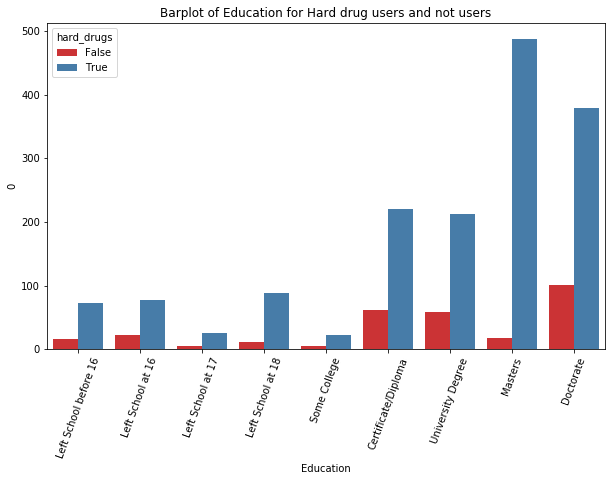

In [47]:
plt.figure(figsize=(10,6))
plt2 = sns.barplot(data = data_grouped, x = "Education", y = 0, hue = "hard_drugs")
plt2.set_xticklabels(['Left School before 16', 'Left School at 16', 'Left School at 17', 'Left School at 18',
                   'Some College', 'Certificate/Diploma', 'University Degree', 'Masters', 'Doctorate'],rotation=70)
plt.title('Barplot of Education for Hard drug users and not users')

#### Here is shown the count of Hard drug users and not users for every Education level, we can see that for all levels Cocaine users are more than not users. And the difference for Masters degree is the highest compared to other education levels. We explain it that maybe in university some people sold drugs 

Text(0.5, 1.0, 'Barplot of Age for "LSD" "Heroin" "Coke" "Mushrooms" users')

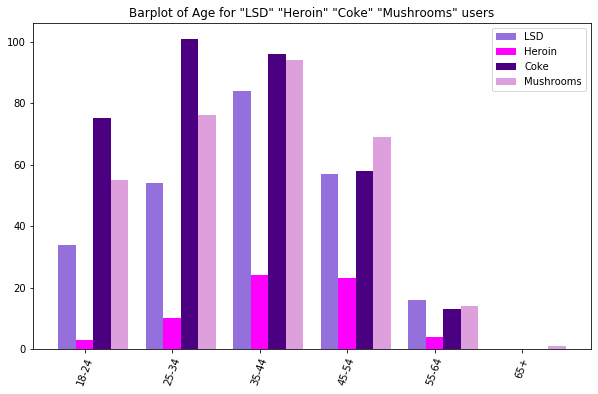

In [48]:
data_drug = data_3.groupby("Age")["LSD" ,"Heroin", "Coke", "Mushrooms" ].sum().reset_index()
x = data_drug["Age"]
plt.figure(figsize=(10,6))
plt.bar(x-0.2, data_drug["LSD"], 0.2, color='mediumpurple')
plt.bar(x, data_drug["Heroin"], 0.2, color='magenta')
plt.bar(x+0.2, data_drug["Coke"], 0.2, color='indigo')
plt.bar(x+0.4, data_drug["Mushrooms"], 0.2, color='plum')
plt.xticks(x,['18-24',
    '25-34',
    '35-44',
    '45-54',
    '55-64',
    '65+' ],rotation=70)
plt.legend(["LSD","Heroin","Coke","Mushrooms"])
plt.title('Barplot of Age for "LSD" "Heroin" "Coke" "Mushrooms" users')

#### Coke is mostly used by 18-24 and 25-34 years old people, as it is more cheaper than mushrooms, and people of this age have less salary than 45-54 years old people or older, so they will buy cheaper drugs than older people, which is clearly shown in plot.

#### So using these visualizations we can find target groups for all kind of drugs, which was the main problem

#### Thanks,
#### Susanna
